# Plot FAILED predicted images

For turning

In [36]:
import sys
import os.path
import glob

from scipy import misc
import numpy as np
import imageio

from utils import plotting_tools

grading_data_dir_name='sample_evaluation_data'

In [74]:
# For warnings of 'misc.imresize'
if not sys.warnoptions:
    import warnings
    warnings.filterwarnings('ignore', category=DeprecationWarning)
    
def get_failed_im_file_sample(grading_dir_name, subset_name, out_folder_suffix = 'run_1', n_file_names=10):
    '''Get list of failed samples and failed status'''

    im_files = np.array(plotting_tools.get_im_file_sample(
        grading_dir_name, subset_name, out_folder_suffix, n_file_names=None))
    gt_files = im_files[:,1]
    pred_files = im_files[:,2]
    
    n_preds = len(gt_files)
    n_false_neg = 0
    n_false_pos = 0

    failed_indexes = []
    for e, gt_file in enumerate(gt_files):
        gt_mask = imageio.imread(gt_file).clip(0, 1)
        pred_mask = (imageio.imread(pred_files[e]) > 127).astype(np.int)

        if gt_mask.shape[0] != pred_mask.shape[0]:
            gt_mask = misc.imresize(gt_mask, pred_mask.shape)

        if gt_mask[:,:,2].sum() > 3:
            if pred_mask[:,:, 2].sum() > 3:
                pass
            else:
                n_false_neg += 1
                failed_indexes.append(e)
        else:
            if pred_mask[:, :, 2].sum() > 3:
                n_false_pos += 1
                failed_indexes.append(e)
    
    random_sample_indexes = np.random.permutation(failed_indexes)[:n_file_names]
    if 0 < len(random_sample_indexes):
        ims_subset = im_files[random_sample_indexes, 0]
        masks_subset = im_files[random_sample_indexes, 1]
        preds_subset = im_files[random_sample_indexes, 2]
    else:
        ims_subset = np.array([],dtype=str)
        masks_subset = np.array([],dtype=str)
        preds_subset = np.array([],dtype=str)
        
    return list(zip(ims_subset, masks_subset, preds_subset)), n_preds, n_false_pos, n_false_neg

All images:  270
number of validation samples intersection over the union evaulated on 270
number false positives: 58(P=0.214815), number false negatives: 0(P=0.0)
number failed: 58(P=0.214815)

Sample images:  58
0


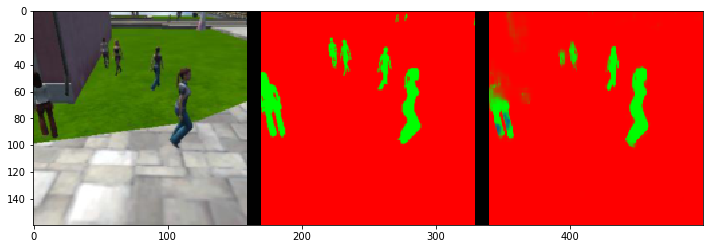

1


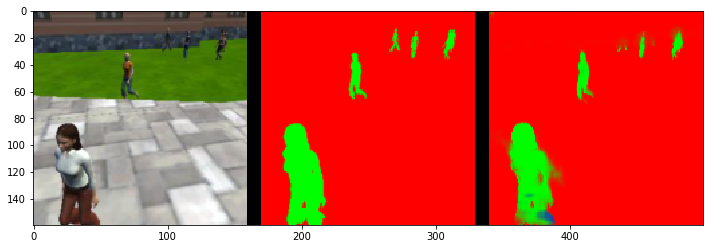

2


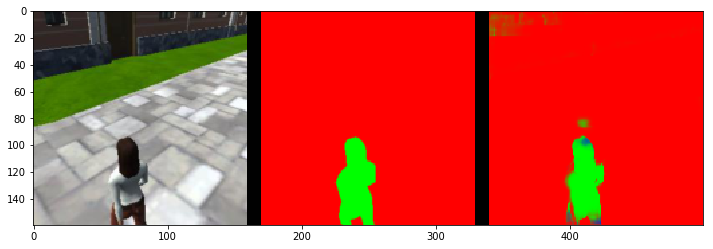

3


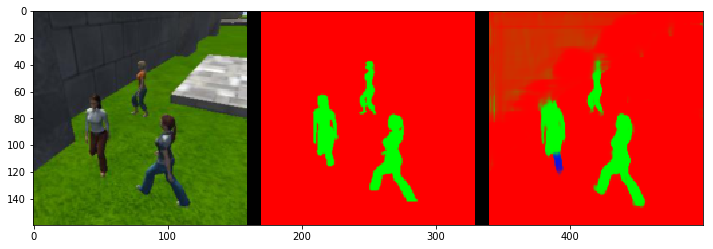

4


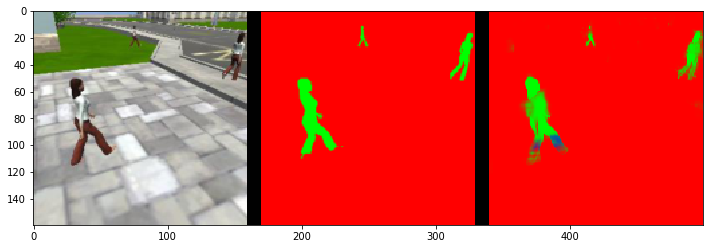

5


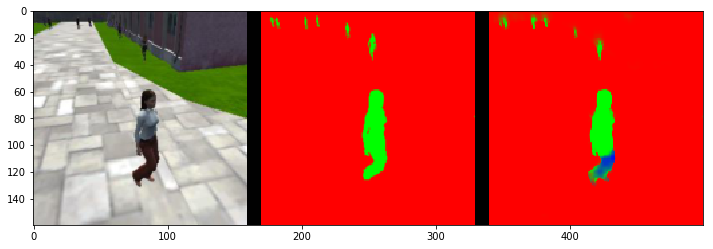

6


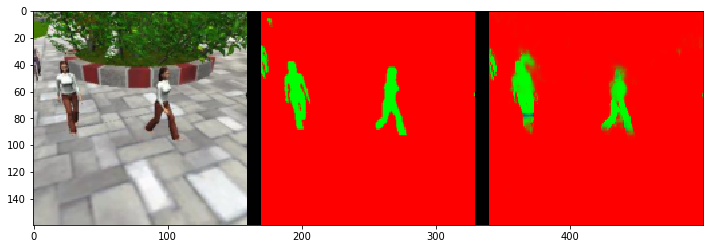

7


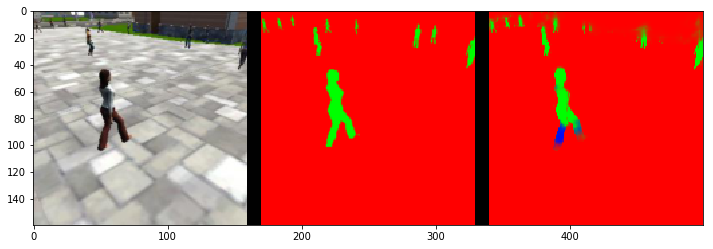

8


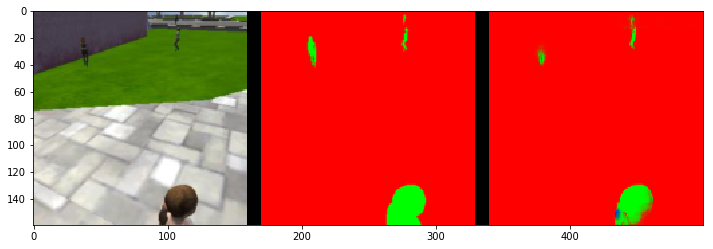

9


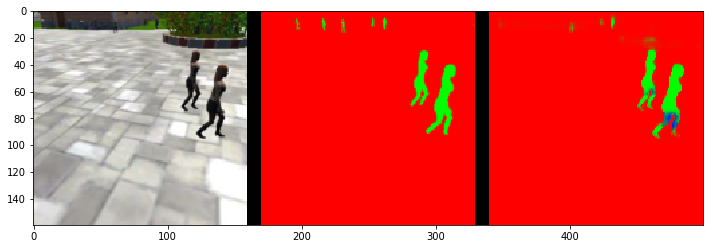

10


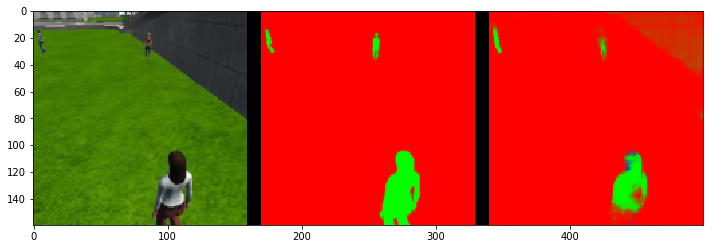

11


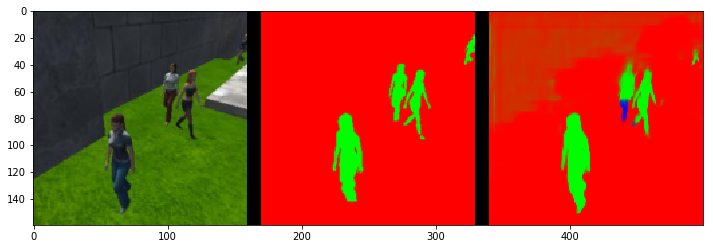

12


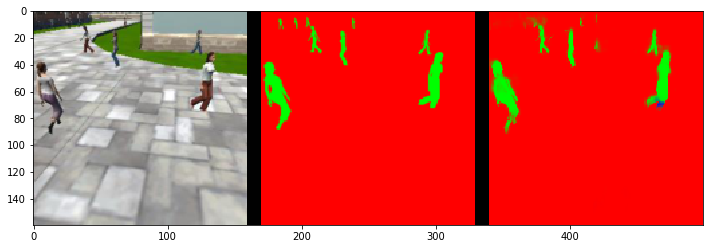

13


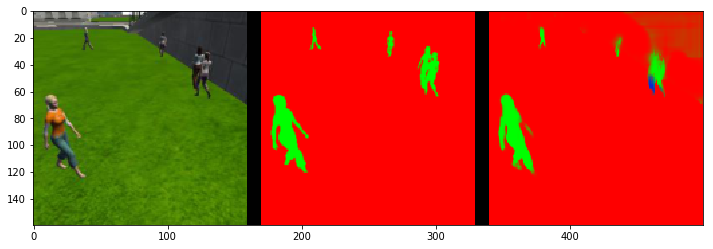

14


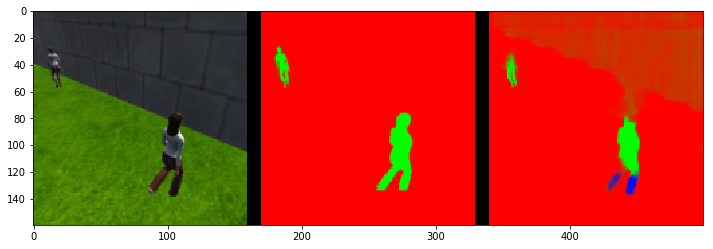

15


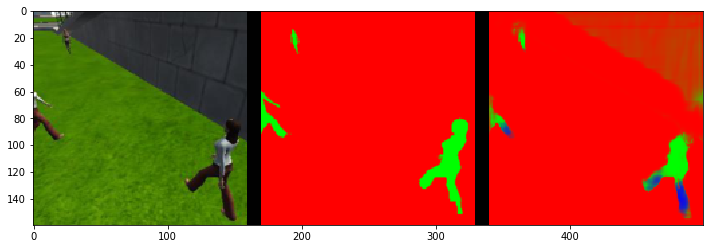

16


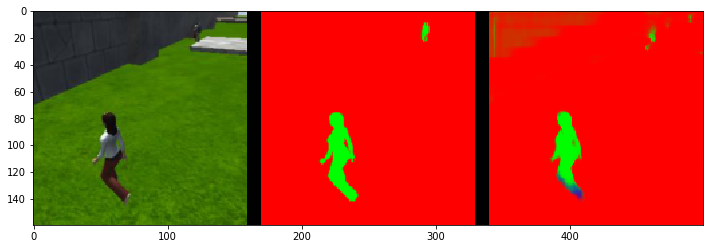

17


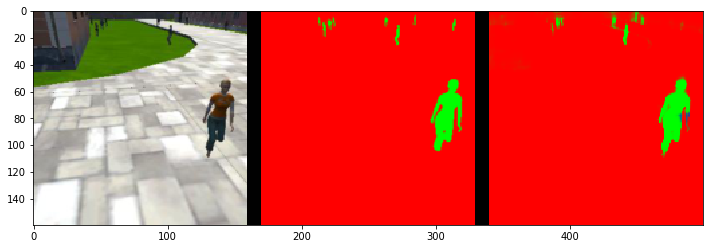

18


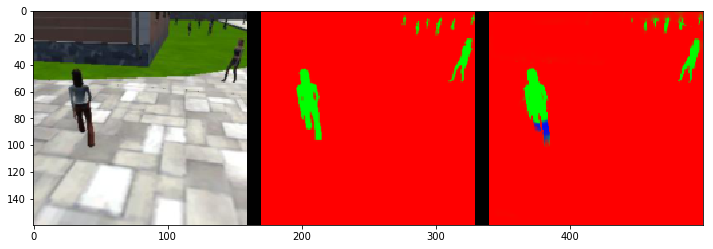

19


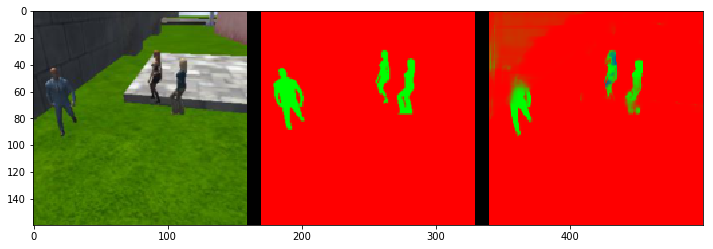

20


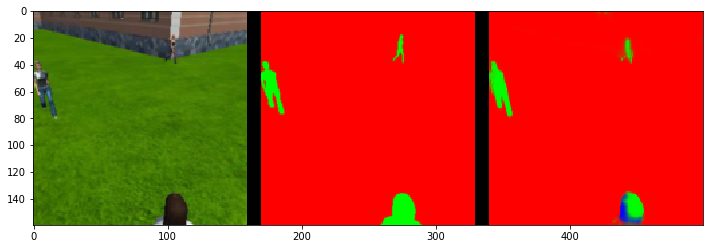

21


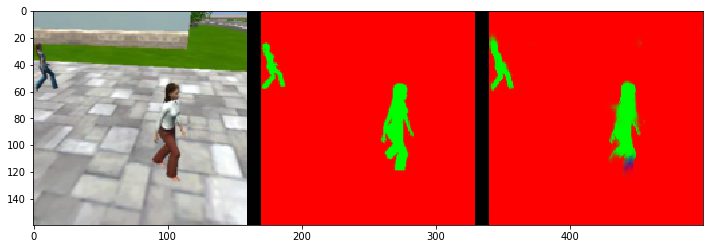

22


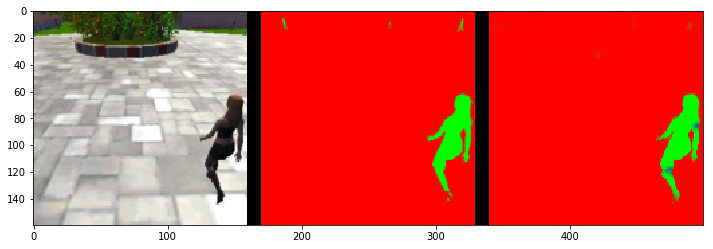

23


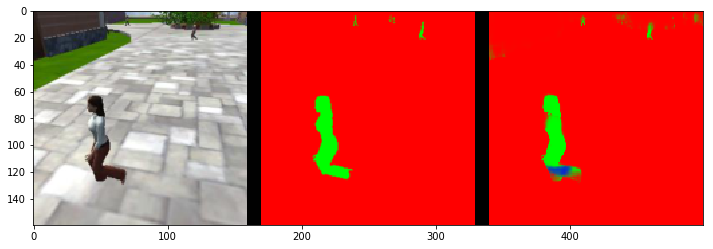

24


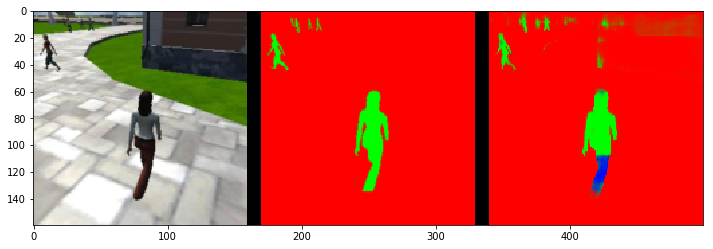

25


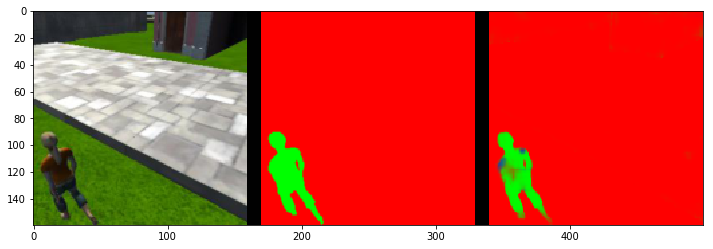

26


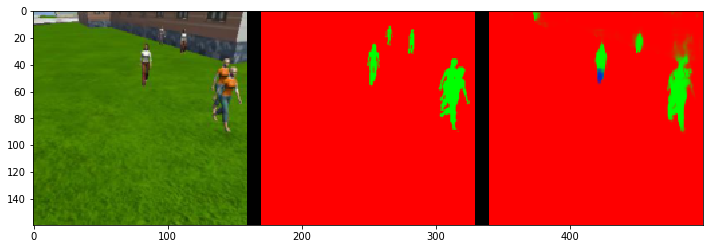

27


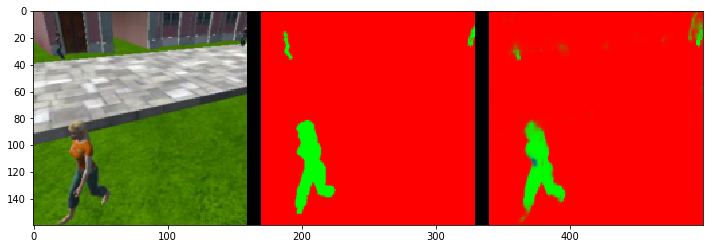

28


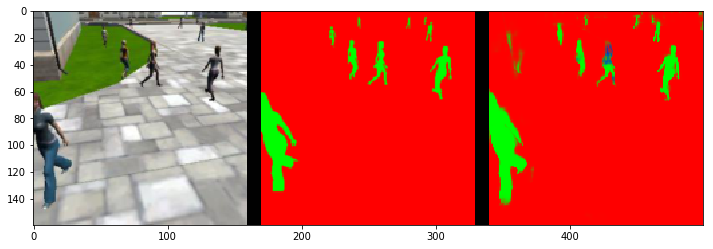

29


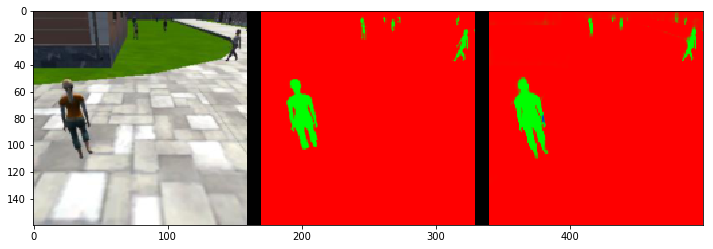

30


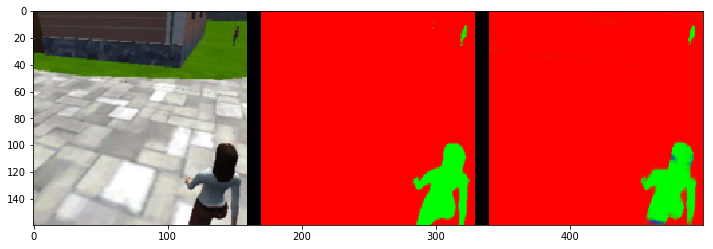

31


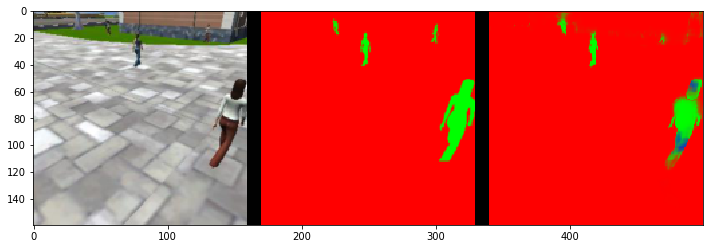

32


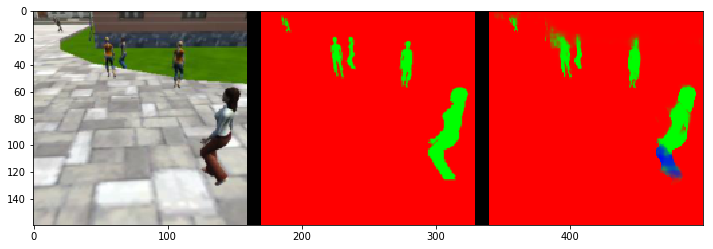

33


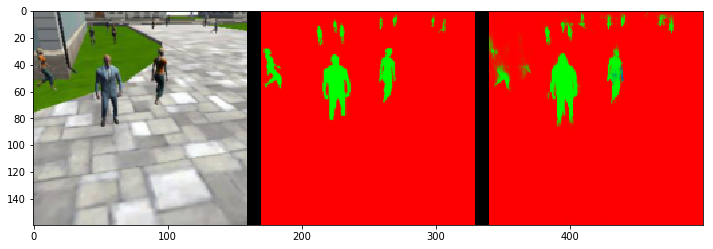

34


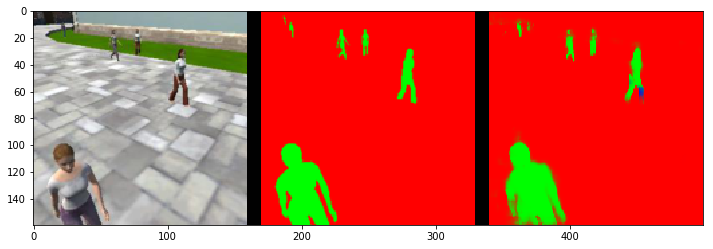

35


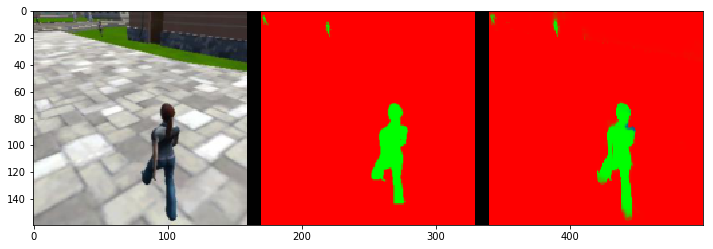

36


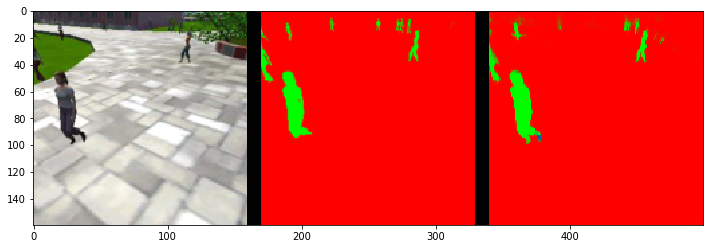

37


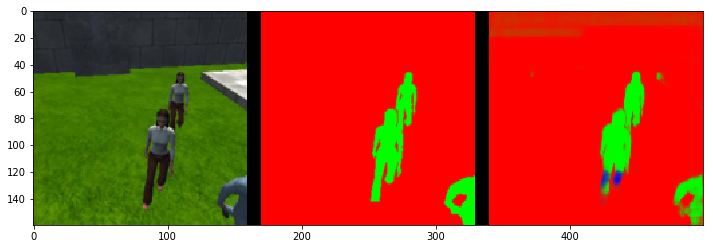

38


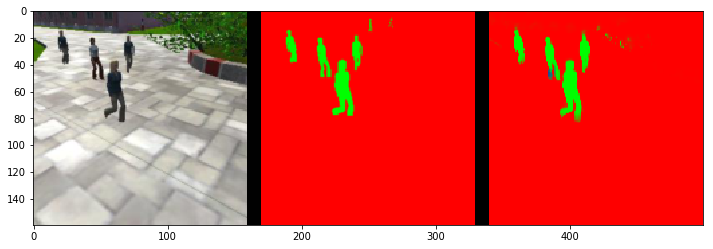

39


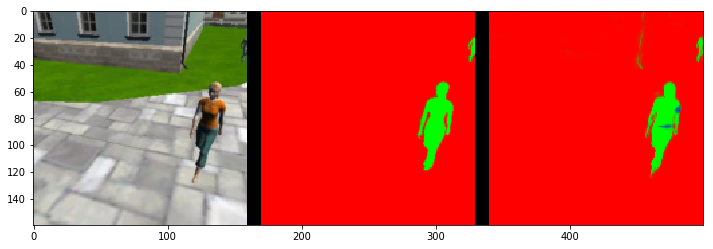

40


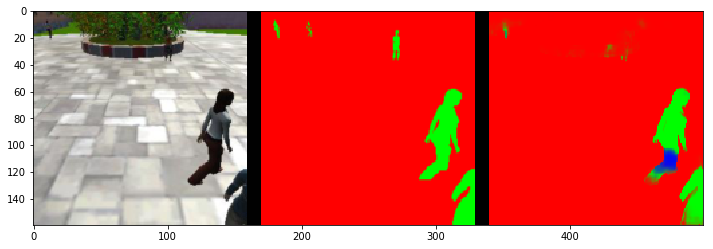

41


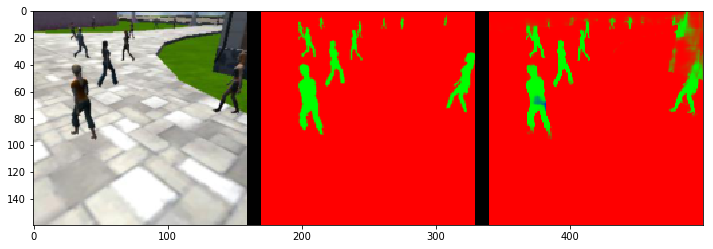

42


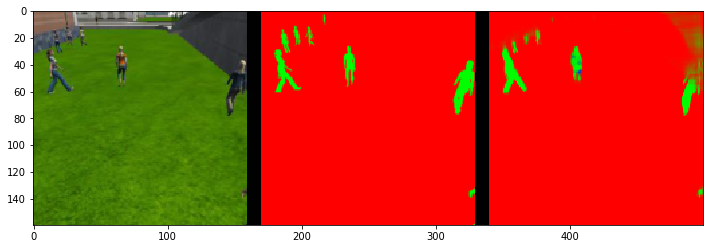

43


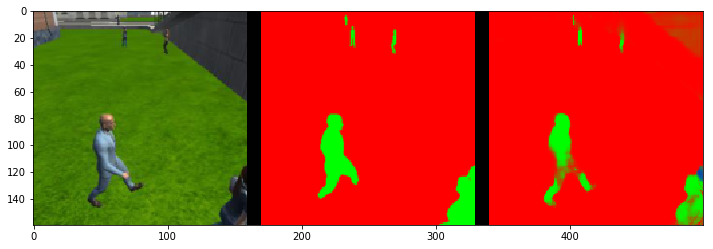

44


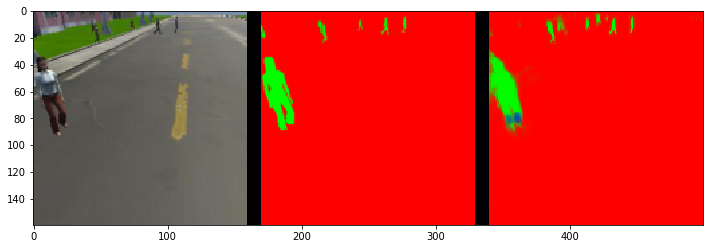

45


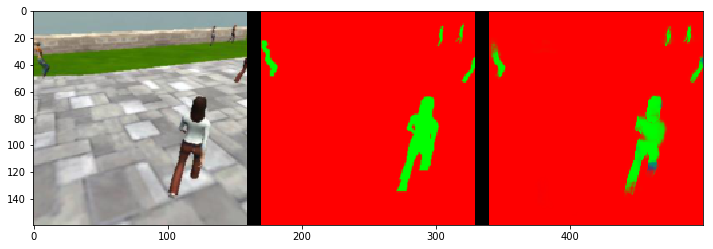

46


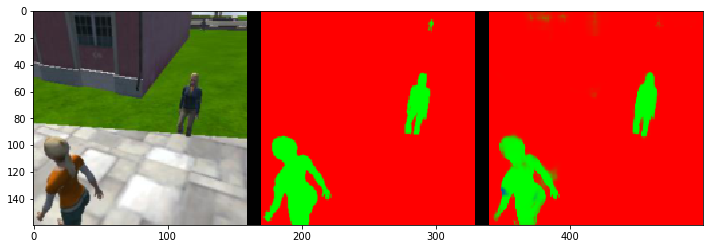

47


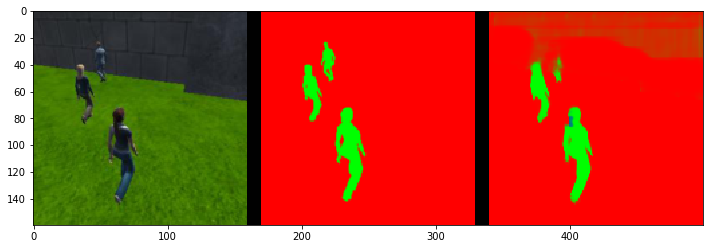

48


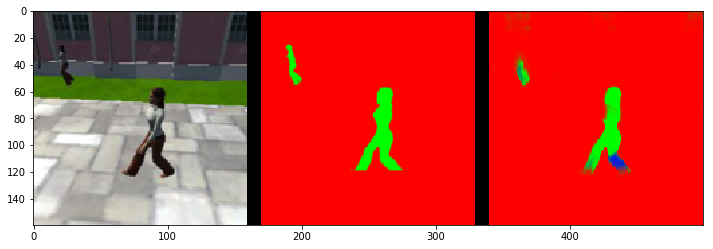

49


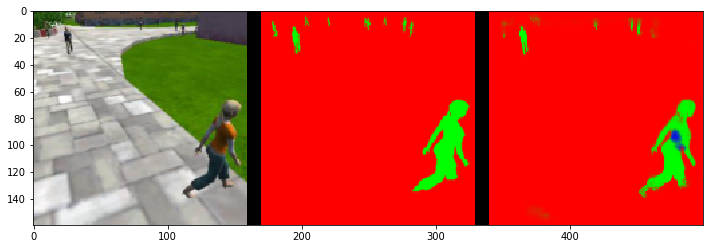

50


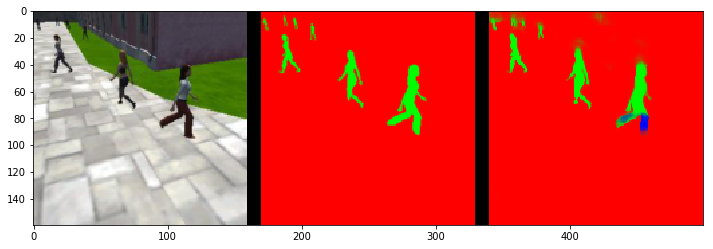

51


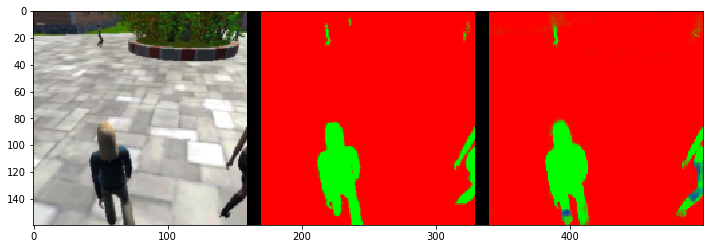

52


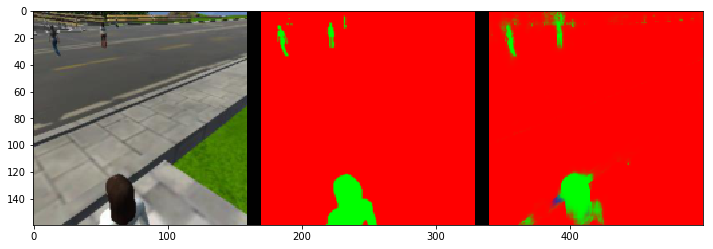

53


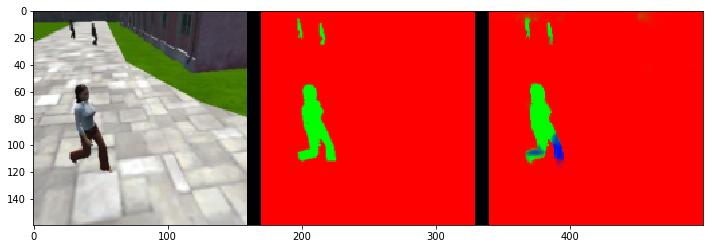

54


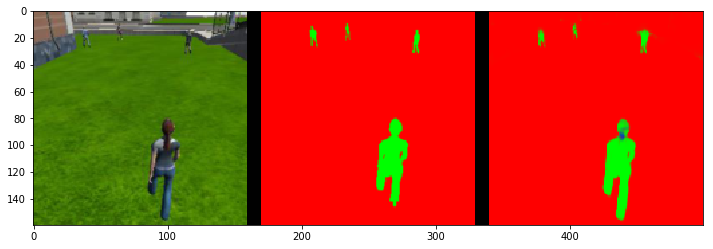

55


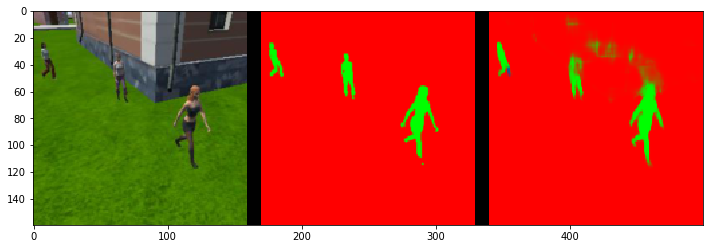

56


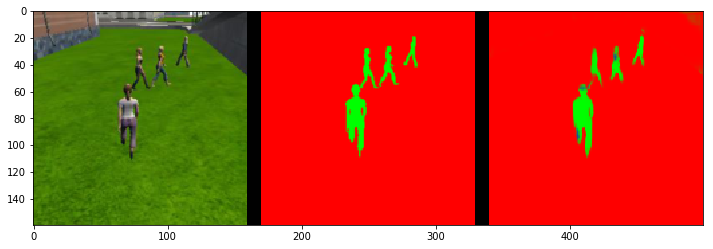

57


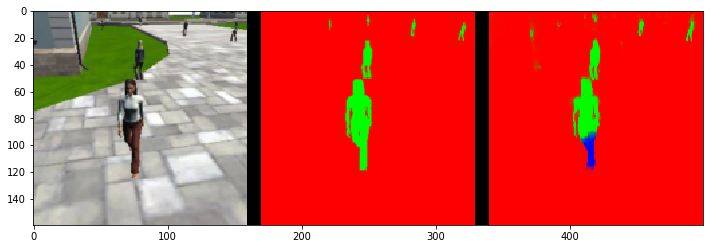

In [75]:
def show_samples(grading_data_dir_name, subset_name, num_of_samples = 100, run_num = 'run_1'):
    """Predicted Samples Viewer"""
    # Count all iamges
    path = os.path.join('..', 'data', grading_data_dir_name)
    ims = np.array(plotting_tools.get_im_files(path, subset_name))
    print('All images: ', len(ims))

    # Show samples
    im_files, n_preds, n_false_pos, n_false_neg = get_failed_im_file_sample(
        grading_data_dir_name, subset_name, run_num, n_file_names=num_of_samples)
    
    print('number of validation samples intersection over the union evaulated on {}'.format(n_preds))
    print('number false positives: {}(P={:.6}), number false negatives: {}(P={:.6})'.\
          format(n_false_pos, n_false_pos/n_preds, n_false_neg, n_false_neg/n_preds))
    print('number failed: {}(P={:.6})'.\
          format(n_false_pos+n_false_neg, (n_false_pos+n_false_neg)/n_preds))
    print()
    
    print('Sample images: ', len(im_files))
    for i in range(len(im_files[:num_of_samples])):
        print(i)
        im_tuple = plotting_tools.load_images(im_files[i])
        plotting_tools.show_images(im_tuple)
        
show_samples(
    grading_data_dir_name, 

    #subset_name='following_images',
    subset_name='patrol_non_targ',
    #subset_name='patrol_with_targ', 
    num_of_samples=100  # None means all samples
)